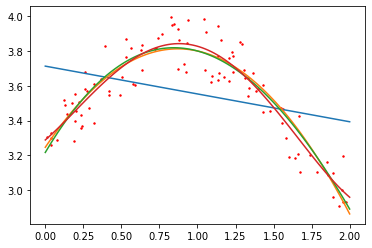

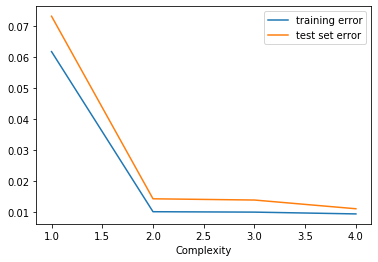

In [1]:
import operator

import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
number_of_samples = 100
np.random.seed(0)
X_plot = np.linspace(0,2,100)
X_plot = X_plot[:,np.newaxis]
X = np.random.uniform(0,2,number_of_samples)
y = ((X+3)*(X-2)*(X-2)*(X+1)*(X+1)*(X+1))/40.0 + 3 + np.random.normal(0,0.1,len(X))
X = X[:,np.newaxis]
y = y[:,np.newaxis]
X_train, X_test, y_train,y_test = train_test_split(X,y)
plt.scatter(X,y,color='red',s=2,marker='o',label='All data')
models = range(1,5)
training_error = []
test_set_error = []
for degree in models:
    classifier = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    classifier.fit(X_train,y_train)
    y_plot=classifier.predict(X_plot)
    plt.plot(X_plot,y_plot,label='degree %d' % degree)
    y_pred_train = classifier.predict(X_train)
    #print("Degree = ",degree)
    #print("Training MSE = ",mean_squared_error(y_pred_train,y_train))
    y_test_pred = classifier.predict(X_test)
    #print("Test MSE = ",mean_squared_error(y_test_pred,y_test))
    training_error.append(mean_squared_error(y_pred_train,y_train))
    test_set_error.append(mean_squared_error(y_test_pred,y_test))
#lr = LinearRegression().fit(X_train,y_train)
#print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
#print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))
#print(training_error)
#plt.legend(loc='upper left')
plt.show()
plt.plot(models,training_error,label='training error')
plt.plot(models,test_set_error,label='test set error')
plt.legend(loc='upper right')
plt.xlabel('Complexity')
plt.show()